The alg used in task A is KNN and logistic regression.

In [196]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [197]:
trainpath='./dataset/taska/' 
testpath='./test/taska/'

transform = transforms.Compose([transforms.Resize((128,128)), #set transfrom type: 128x128 resolution, grayscale image
transforms.Grayscale(num_output_channels=1)])
traindata = datasets.ImageFolder(trainpath, transform) #load the data and the transformation type
testdata = datasets.ImageFolder(testpath, transform)
imagedata = []
imagelabel = []

for image,label in traindata: #change image data from PIL to array

    imagenp = np.array(image, dtype=np.float32)
    imagenp = imagenp.flatten().tolist()
    imagedata.append(imagenp)#add each image list to a big list
    imagelabel.append(label)

imagetest=[]
imagetestlabel=[]

for image,label in testdata:
    
    imagenp = np.array(image, dtype=np.float32)
    imagenp = imagenp.flatten().tolist()
    imagetest.append(imagenp)
    imagetestlabel.append(label)

In [198]:
imagedata = np.array(imagedata) #transform data to numpy array
imagelabel = np.array(imagelabel)
imagetest = np.array(imagetest)
imagetestlabel = np.array(imagetestlabel)

x_train, x_test, y_train, y_test = train_test_split(imagedata, imagelabel, test_size=0.1,random_state=1) #split train and test data

In [199]:
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
score_list=[accuracy_score(y_test,y_pred)]

for i in range(2,16): #for a range value of k.
   knn = KNeighborsClassifier(n_neighbors=i)
   knn.fit(x_train,y_train)
   pred_i = knn.predict(x_test)
   count = accuracy_score(y_test,pred_i)
   if count > max(score_list):
      y_pred = pred_i
      n=i
   score_list.append(count)

In [200]:
targetnames = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=targetnames))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87        46
         Yes       0.98      0.97      0.98       254

    accuracy                           0.96       300
   macro avg       0.92      0.93      0.92       300
weighted avg       0.96      0.96      0.96       300



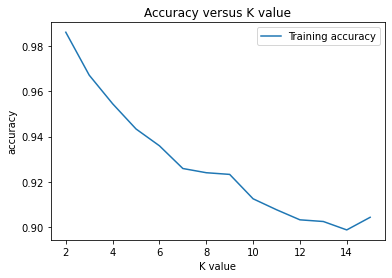

max accuracy is 0.9859259259259259


In [201]:
neighbors = np.arange(2, 16)
accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors): #for a range value of k
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    
    accuracy[i] = knn.score(x_train, y_train)
    n = max(accuracy)


plt.title('Accuracy versus K value')
plt.plot(neighbors, accuracy, label = 'Training accuracy')
plt.xlabel('K value')
plt.ylabel('accuracy')
plt.legend()
plt.show()
n = max(accuracy)
print("max accuracy is "+str(n))

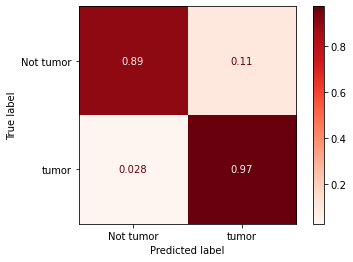

In [202]:
conf = confusion_matrix(y_test, y_pred, normalize='true')
dis = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=['Not tumor', 'tumor'])
dis = dis.plot(cmap=plt.cm.Reds)
plt.show()

In [203]:
error = mean_squared_error(y_test,y_pred)
print('Mean squared error is:'+str(error))

Mean squared error is:0.04


Test dataset

In [204]:
y_pred1 = kn.predict(imagetest)
target_names = ['Not tumor', 'tumor']
print(classification_report(imagetestlabel, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

   Not tumor       0.94      0.89      0.92        37
       tumor       0.98      0.99      0.98       163

    accuracy                           0.97       200
   macro avg       0.96      0.94      0.95       200
weighted avg       0.97      0.97      0.97       200



In [205]:
error = mean_squared_error(imagetestlabel,y_pred1)
print('Mean squared error is:'+str(error))

Mean squared error is:0.03


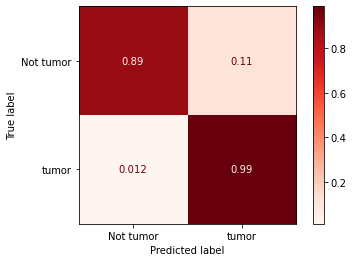

In [206]:
conf = confusion_matrix(imagetestlabel, y_pred1, normalize='true')
dis = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=['Not tumor', 'tumor'])
dis = dis.plot(cmap=plt.cm.Reds)
plt.show()